In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [105]:
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')

In [106]:
df

,측정 연도,측정 월,측정 일자,정점명,위도,경도,날씨,수심,수층,투명도,...,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이
0,2021,11,2021-11-20,대정1,33.202500,126.251667,맑음,20.0,표층,9.0,...,6.50,3.07,52.64,62.20,113.12,9.80,13.21,157.11,33.70,0.93
1,2021,11,2021-11-20,대정2,33.220000,126.327500,맑음,28.0,표층,9.0,...,3.26,1.53,10.47,15.26,118.83,4.90,17.52,67.65,22.00,2.90
2,2021,11,2021-11-20,대정3,33.237778,126.202778,맑음,28.0,표층,10.0,...,6.55,2.76,38.81,48.12,145.28,8.31,14.85,129.39,23.90,1.24
3,2021,11,2021-11-20,서귀포1,33.262500,126.661111,맑음,30.0,표층,12.0,...,9.42,2.13,29.65,41.20,136.81,6.26,19.22,123.98,22.70,0.98
4,2021,11,2021-11-20,서귀포2,33.229444,126.412500,맑음,23.0,표층,13.0,...,12.01,2.62,34.82,49.45,110.29,6.63,15.90,90.72,25.15,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2012,11,NaN,표선1,33.280833,126.767500,맑음,13.0,저층,9.5,...,5.10,9.00,61.90,76.00,161.00,7.80,10.90,245.20,5.67,2.65
2732,2012,11,NaN,표선2,33.325556,126.865556,맑음,29.0,저층,10.0,...,2.60,9.80,55.60,68.00,154.90,7.10,10.70,208.80,17.00,2.70
2733,2012,11,NaN,한림1,33.376111,126.185000,맑음,32.0,저층,7.0,...,6.20,8.10,70.80,85.10,165.50,9.40,10.80,233.90,19.33,1.98
2734,2012,11,NaN,한림2,33.463056,126.274444,맑음,38.0,저층,7.5,...,4.40,5.70,60.00,70.10,166.50,5.70,8.70,219.00,56.67,1.74


In [107]:
df.isnull().sum()

측정 연도               0
측정 월                0
측정 일자            1102
정점명                 0
위도                  0
경도                  0
날씨               1064
수심               1064
수층                  0
투명도                 0
수질평가지수(WQI)등급       0
수온                  0
염분                  0
수소이온농도              0
용존산소량               0
화학적산소요구량            0
암모니아성질소             0
아질산성질소              0
질산성질소               0
용존무기질소              0
총질소                 0
용존무기인               0
총인                  0
규산규소                0
부유물질                0
클로로필에이              0
dtype: int64

In [108]:
df = df.dropna()

In [109]:
df.isnull().sum()

측정 연도            0
측정 월             0
측정 일자            0
정점명              0
위도               0
경도               0
날씨               0
수심               0
수층               0
투명도              0
수질평가지수(WQI)등급    0
수온               0
염분               0
수소이온농도           0
용존산소량            0
화학적산소요구량         0
암모니아성질소          0
아질산성질소           0
질산성질소            0
용존무기질소           0
총질소              0
용존무기인            0
총인               0
규산규소             0
부유물질             0
클로로필에이           0
dtype: int64

In [110]:
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/384430295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)


In [111]:
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

In [112]:
dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df

,측정 연도,측정 월,측정 일자,정점명,위도,경도,수심,투명도,수질등급,수온,...,총인,규산규소,부유물질,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층
0,2021,11,2021-11-20,대정1,33.202500,126.251667,20.0,9.0,1,19.91,...,13.21,157.11,33.70,0.93,0,0,1,0,0,1
1,2021,11,2021-11-20,대정2,33.220000,126.327500,28.0,9.0,2,20.27,...,17.52,67.65,22.00,2.90,0,0,1,0,0,1
2,2021,11,2021-11-20,대정3,33.237778,126.202778,28.0,10.0,1,19.94,...,14.85,129.39,23.90,1.24,0,0,1,0,0,1
3,2021,11,2021-11-20,서귀포1,33.262500,126.661111,30.0,12.0,1,20.41,...,19.22,123.98,22.70,0.98,0,0,1,0,0,1
4,2021,11,2021-11-20,서귀포2,33.229444,126.412500,23.0,13.0,1,20.53,...,15.90,90.72,25.15,0.66,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2011,2,2011-02-22,조천1,33.537500,126.855556,11.0,5.0,2,13.09,...,31.20,185.80,3.30,0.44,0,1,0,0,1,0
1630,2011,2,2011-02-22,조천2,33.573889,126.732778,38.0,5.2,2,13.14,...,25.00,179.70,2.30,0.84,0,1,0,0,1,0
1631,2011,2,2011-02-22,조천3,33.560556,126.666389,15.0,6.5,2,13.26,...,25.50,214.60,3.90,0.44,0,1,0,0,1,0
1632,2011,2,2011-02-22,표선1,33.280833,126.767500,74.0,8.2,1,15.03,...,29.20,252.20,1.90,1.22,0,1,0,0,1,0


In [113]:
df['정점명'].unique()

array(['대정1', '대정2', '대정3', '서귀포1', '서귀포2', '서귀포3', '한림1', '한림2', '한림3',
       '성산포1', '성산포2', '제주1', '제주2', '제주3', '조천1', '조천2', '조천3', '표선1',
       '표선2'], dtype=object)

In [114]:
df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

In [115]:
df

,측정 연도,측정 월,측정 일자,정점명,위도,경도,수심,투명도,수질등급,수온,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
0,2021,11,2021-11-20,대정1,33.202500,126.251667,20.0,9.0,1,19.91,...,0.93,0,0,1,0,0,1,2021,11,20
1,2021,11,2021-11-20,대정2,33.220000,126.327500,28.0,9.0,2,20.27,...,2.90,0,0,1,0,0,1,2021,11,20
2,2021,11,2021-11-20,대정3,33.237778,126.202778,28.0,10.0,1,19.94,...,1.24,0,0,1,0,0,1,2021,11,20
3,2021,11,2021-11-20,서귀포1,33.262500,126.661111,30.0,12.0,1,20.41,...,0.98,0,0,1,0,0,1,2021,11,20
4,2021,11,2021-11-20,서귀포2,33.229444,126.412500,23.0,13.0,1,20.53,...,0.66,0,0,1,0,0,1,2021,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2011,2,2011-02-22,조천1,33.537500,126.855556,11.0,5.0,2,13.09,...,0.44,0,1,0,0,1,0,2011,2,22
1630,2011,2,2011-02-22,조천2,33.573889,126.732778,38.0,5.2,2,13.14,...,0.84,0,1,0,0,1,0,2011,2,22
1631,2011,2,2011-02-22,조천3,33.560556,126.666389,15.0,6.5,2,13.26,...,0.44,0,1,0,0,1,0,2011,2,22
1632,2011,2,2011-02-22,표선1,33.280833,126.767500,74.0,8.2,1,15.03,...,1.22,0,1,0,0,1,0,2011,2,22


In [116]:
df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [117]:
df

,측정 일자,정점명,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
0,2021-11-20,대정1,20.0,9.0,1,19.91,34.17,8.12,8.18,0.58,...,0.93,0,0,1,0,0,1,2021,11,20
1,2021-11-20,대정2,28.0,9.0,2,20.27,34.14,8.15,9.00,1.71,...,2.90,0,0,1,0,0,1,2021,11,20
2,2021-11-20,대정3,28.0,10.0,1,19.94,34.16,8.14,9.34,1.40,...,1.24,0,0,1,0,0,1,2021,11,20
3,2021-11-20,서귀포1,30.0,12.0,1,20.41,34.04,8.16,9.49,1.76,...,0.98,0,0,1,0,0,1,2021,11,20
4,2021-11-20,서귀포2,23.0,13.0,1,20.53,34.08,8.15,8.81,1.63,...,0.66,0,0,1,0,0,1,2021,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2011-02-22,조천1,11.0,5.0,2,13.09,34.60,8.10,9.52,0.29,...,0.44,0,1,0,0,1,0,2011,2,22
1630,2011-02-22,조천2,38.0,5.2,2,13.14,34.58,8.10,9.45,1.11,...,0.84,0,1,0,0,1,0,2011,2,22
1631,2011-02-22,조천3,15.0,6.5,2,13.26,34.58,8.09,9.31,2.08,...,0.44,0,1,0,0,1,0,2011,2,22
1632,2011-02-22,표선1,74.0,8.2,1,15.03,34.50,8.10,8.70,0.12,...,1.22,0,1,0,0,1,0,2011,2,22


In [118]:
df.columns

Index(['측정 일자', '정점명', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림',
       '수층_저층', '수층_표층', '년', '월', '일'],
      dtype='object')

In [119]:
df.dtypes

측정 일자       datetime64[ns]
정점명                 object
수심                 float64
투명도                float64
수질등급                 int64
수온                 float64
염분                 float64
수소이온농도             float64
용존산소량              float64
화학적산소요구량           float64
암모니아성질소            float64
아질산성질소             float64
질산성질소              float64
용존무기질소             float64
총질소                float64
용존무기인              float64
총인                 float64
규산규소               float64
부유물질               float64
클로로필에이             float64
날씨_구름많음              int64
날씨_구름조금              int64
날씨_맑음                int64
날씨_흐림                int64
수층_저층                int64
수층_표층                int64
년                    int64
월                    int64
일                    int64
dtype: object

In [120]:
df['정점명'].unique()

array(['대정1', '대정2', '대정3', '서귀포1', '서귀포2', '서귀포3', '한림1', '한림2', '한림3',
       '성산포1', '성산포2', '제주1', '제주2', '제주3', '조천1', '조천2', '조천3', '표선1',
       '표선2'], dtype=object)

In [121]:
seongsan = df[df['정점명'].isin(['성산포1', '성산포2'])].drop(['정점명'], axis=1)
jeju = df[df['정점명'].isin(['제주1', '제주2', '제주3'])].drop(['정점명'], axis=1)
jocheon = df[df['정점명'].isin(['조천1', '조천2', '조천3'])].drop(['정점명'], axis=1)
seogwipo = df[df['정점명'].isin(['서귀포1', '서귀포2', '서귀포3'])].drop(['정점명'], axis=1)
pyoseon = df[df['정점명'].isin(['표선1', '표선2'])].drop(['정점명'], axis=1)
hanlim = df[df['정점명'].isin(['한림1', '한림2', '한림3'])].drop(['정점명'], axis=1)
daejeong = df[df['정점명'].isin(['대정1', '대정2', '대정3'])].drop(['정점명'], axis=1)


In [156]:
seongsan

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
18,2021-11-18,16.0,12.0,1,19.35,33.98,8.15,9.25,1.37,11.10,...,1.07,0,0,1,0,0,1,2021,11,18
19,2021-11-18,46.0,12.0,1,20.00,34.08,8.15,8.32,1.52,13.76,...,0.96,0,0,1,0,0,1,2021,11,18
28,2021-11-18,16.0,12.0,1,19.34,33.99,8.11,7.88,1.00,8.13,...,0.67,0,0,1,0,1,0,2021,11,18
29,2021-11-18,46.0,12.0,1,19.55,34.00,8.11,8.21,1.22,9.55,...,0.84,0,0,1,0,1,0,2021,11,18
39,2021-08-31,16.0,9.0,2,23.38,31.35,8.26,10.35,2.05,7.20,...,1.82,0,0,1,0,0,1,2021,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2011-05-16,17.0,7.8,1,15.18,34.16,8.38,8.23,0.52,16.70,...,0.00,0,0,1,0,1,0,2011,5,16
1614,2011-02-22,13.0,8.0,1,13.47,34.60,8.10,9.07,1.36,9.50,...,0.40,0,1,0,0,0,1,2011,2,22
1615,2011-02-22,50.0,8.2,1,13.73,34.54,8.11,9.06,1.49,2.40,...,0.61,0,1,0,0,0,1,2011,2,22
1625,2011-02-22,13.0,8.0,1,13.37,34.60,8.10,9.86,1.52,8.90,...,0.64,0,1,0,0,1,0,2011,2,22


In [122]:
seongsan.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

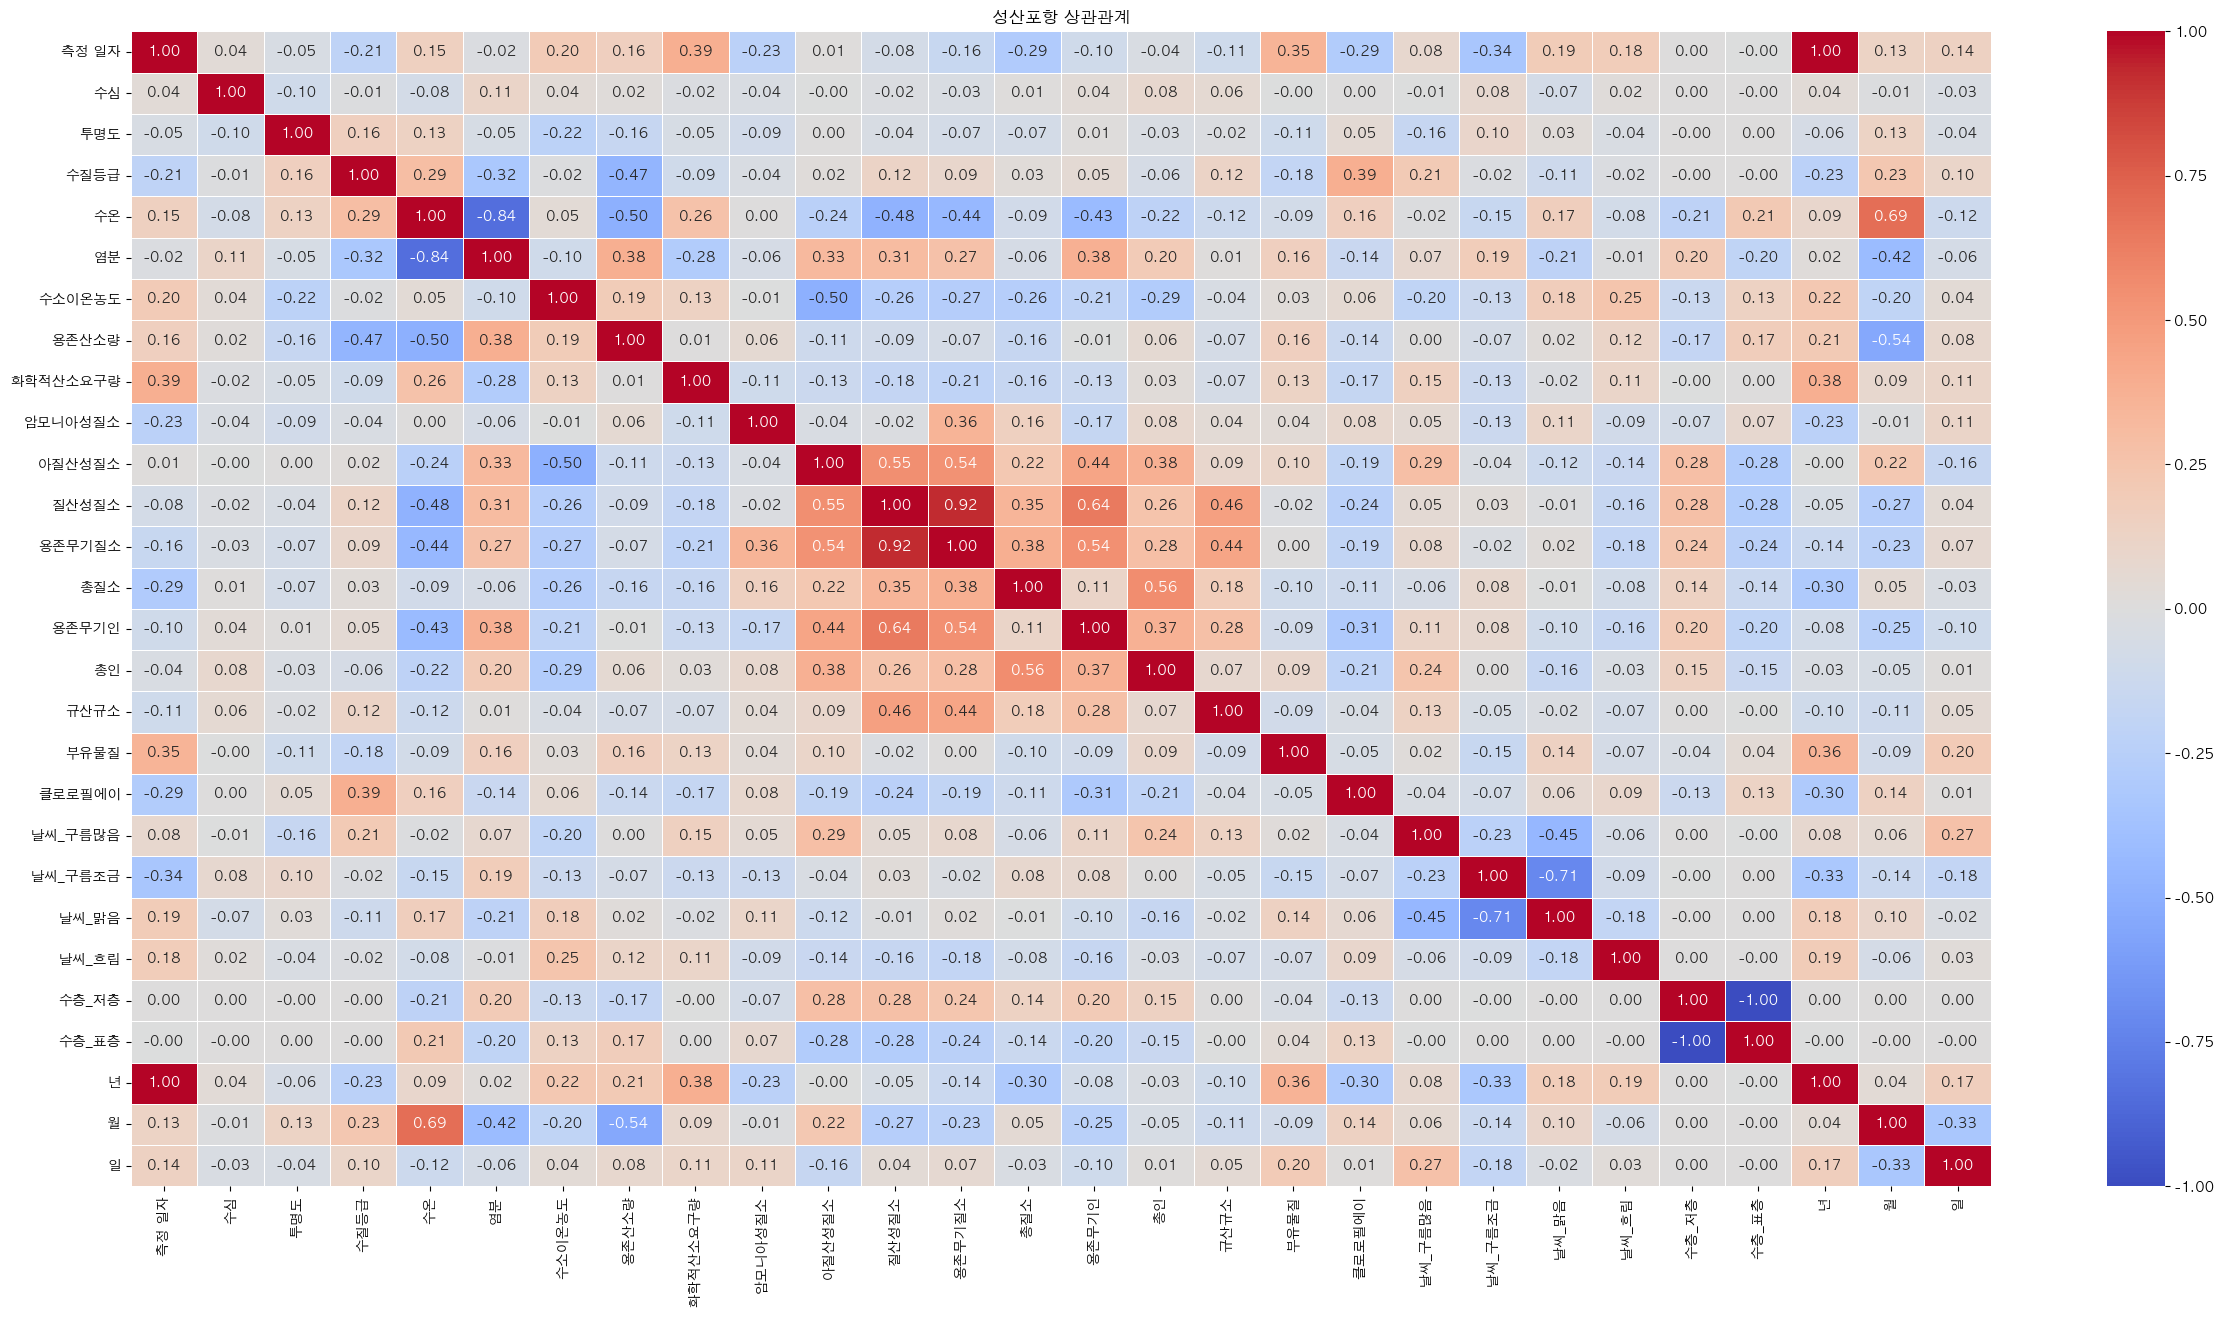

In [123]:
# Calculating the correlation between '최고기온', '최저기온', and '평균기온'
seongsancorr = seongsan.corr()

# Plotting the heatmap for these specific features
plt.figure(figsize=(30, 15))
sns.heatmap(seongsancorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('성산포항 상관관계')
plt.show()


# 기온과 월과 수온의 상관관계 파악

In [143]:
temp = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [144]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
18,19.35,0,0,1,0,11
19,20.00,0,0,1,0,11
28,19.34,0,0,1,0,11
29,19.55,0,0,1,0,11
39,23.38,0,0,1,0,8
...,...,...,...,...,...,...
1591,15.18,0,0,1,0,5
1614,13.47,0,1,0,0,2
1615,13.73,0,1,0,0,2
1625,13.37,0,1,0,0,2


In [145]:
tempcorrs=temp.corr()


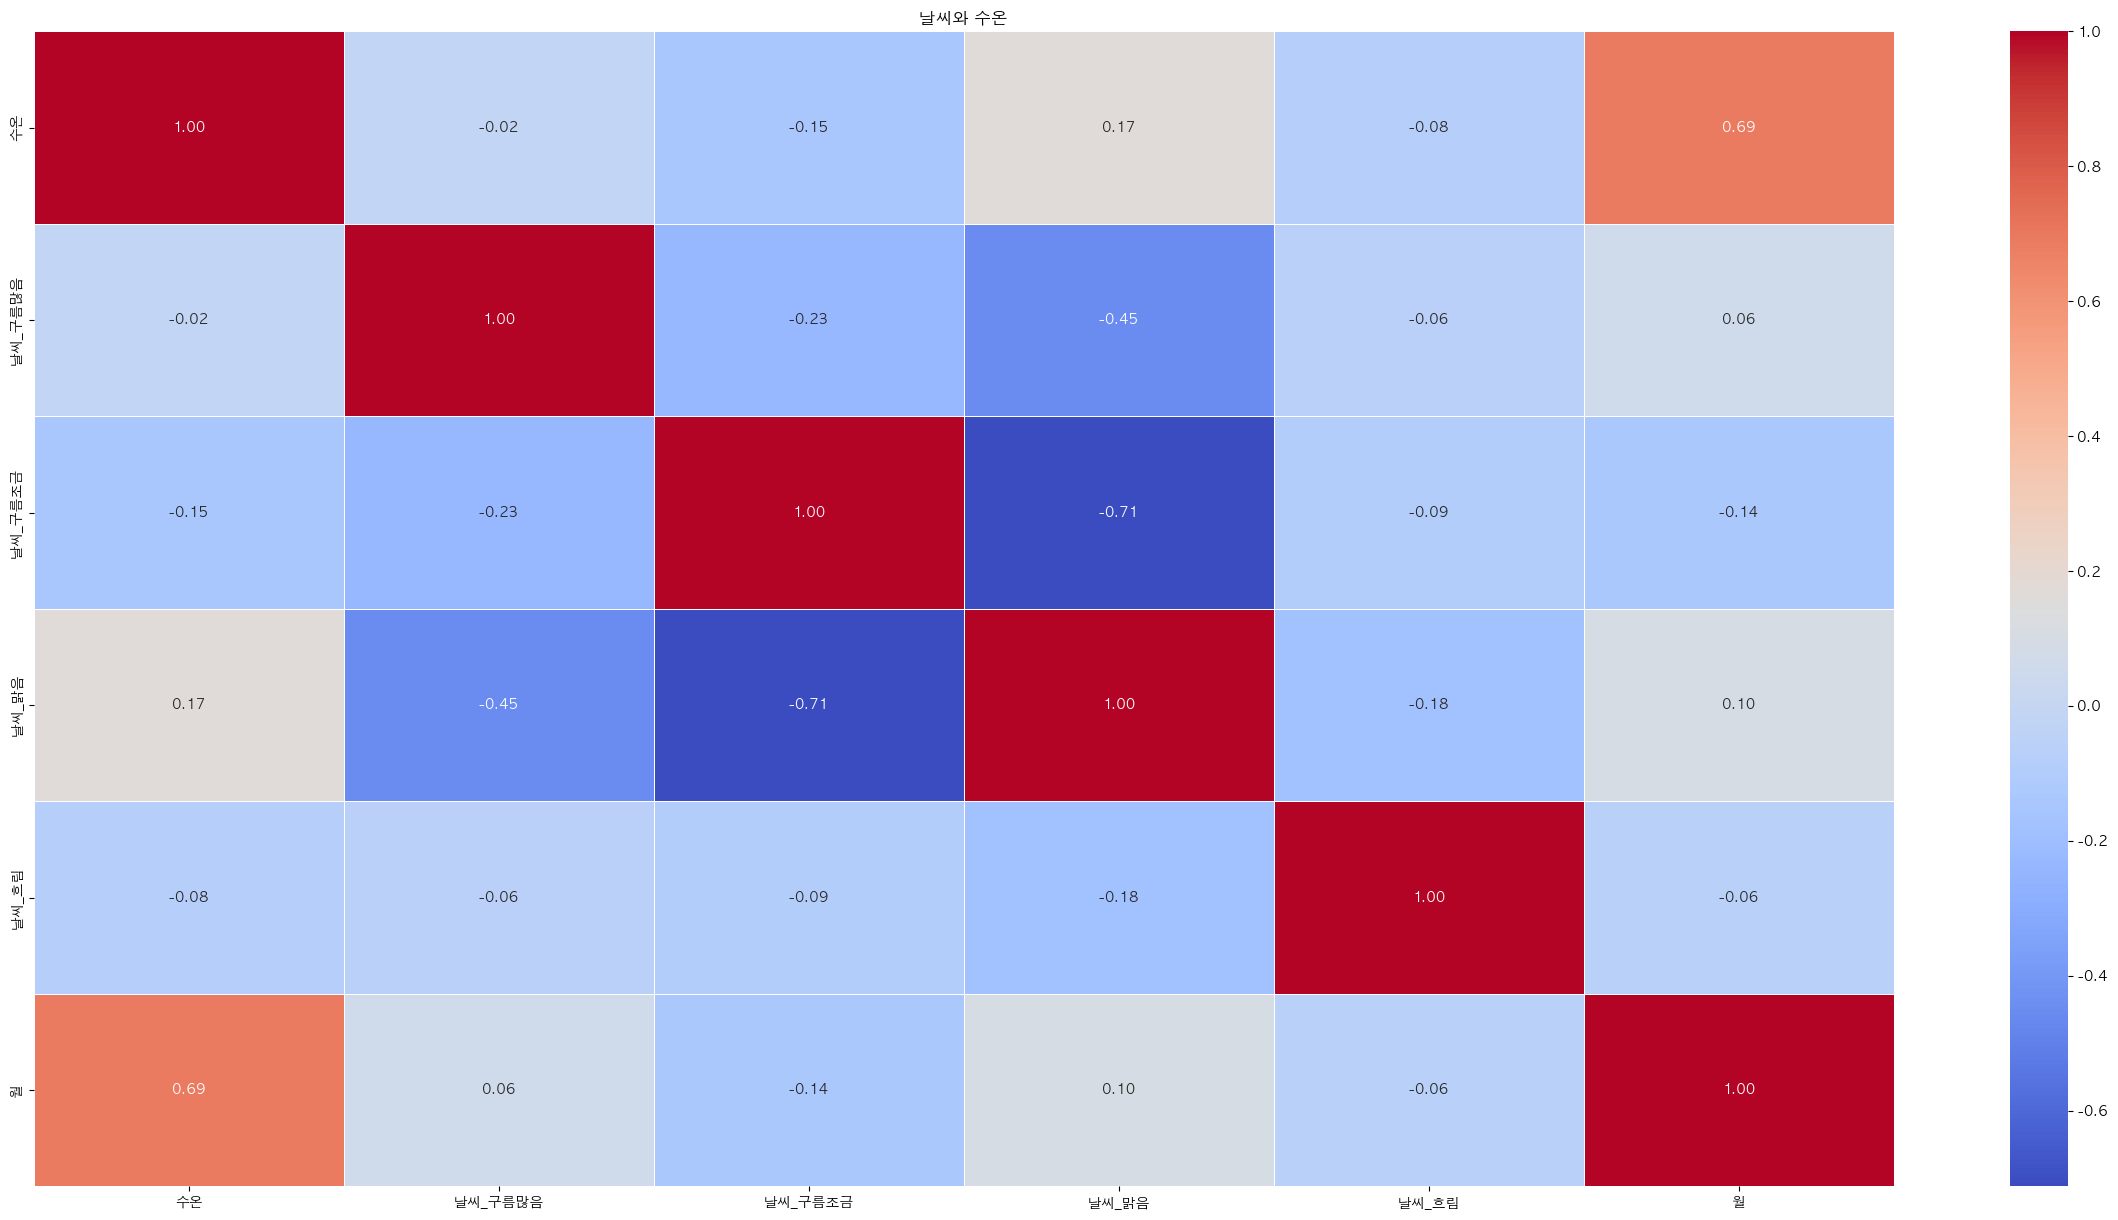

In [146]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

# 화학적 요소들사이의 상관관계 파악

In [147]:
che = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [148]:
che

,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이
18,8.15,9.25,1.37,11.10,3.91,29.48,44.49,151.62,7.29,17.67,113.96,23.60,1.07
19,8.15,8.32,1.52,13.76,2.49,12.81,29.06,132.66,3.29,16.46,61.88,23.90,0.96
28,8.11,7.88,1.00,8.13,5.60,48.33,62.06,219.52,10.23,19.10,175.84,23.35,0.67
29,8.11,8.21,1.22,9.55,5.35,42.88,57.78,169.09,7.53,20.93,153.13,20.75,0.84
39,8.26,10.35,2.05,7.20,1.20,14.00,22.40,110.53,1.40,7.78,46.48,28.10,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,8.38,8.23,0.52,16.70,2.40,26.80,45.90,243.50,7.00,24.70,196.40,2.30,0.00
1614,8.10,9.07,1.36,9.50,3.00,34.50,47.00,227.50,15.20,25.20,229.70,6.10,0.40
1615,8.11,9.06,1.49,2.40,4.10,35.60,42.20,256.00,16.30,29.60,183.90,3.20,0.61
1625,8.10,9.86,1.52,8.90,4.20,51.00,64.10,239.50,11.70,26.80,193.00,7.80,0.64


In [149]:
checorrs = che.corr()

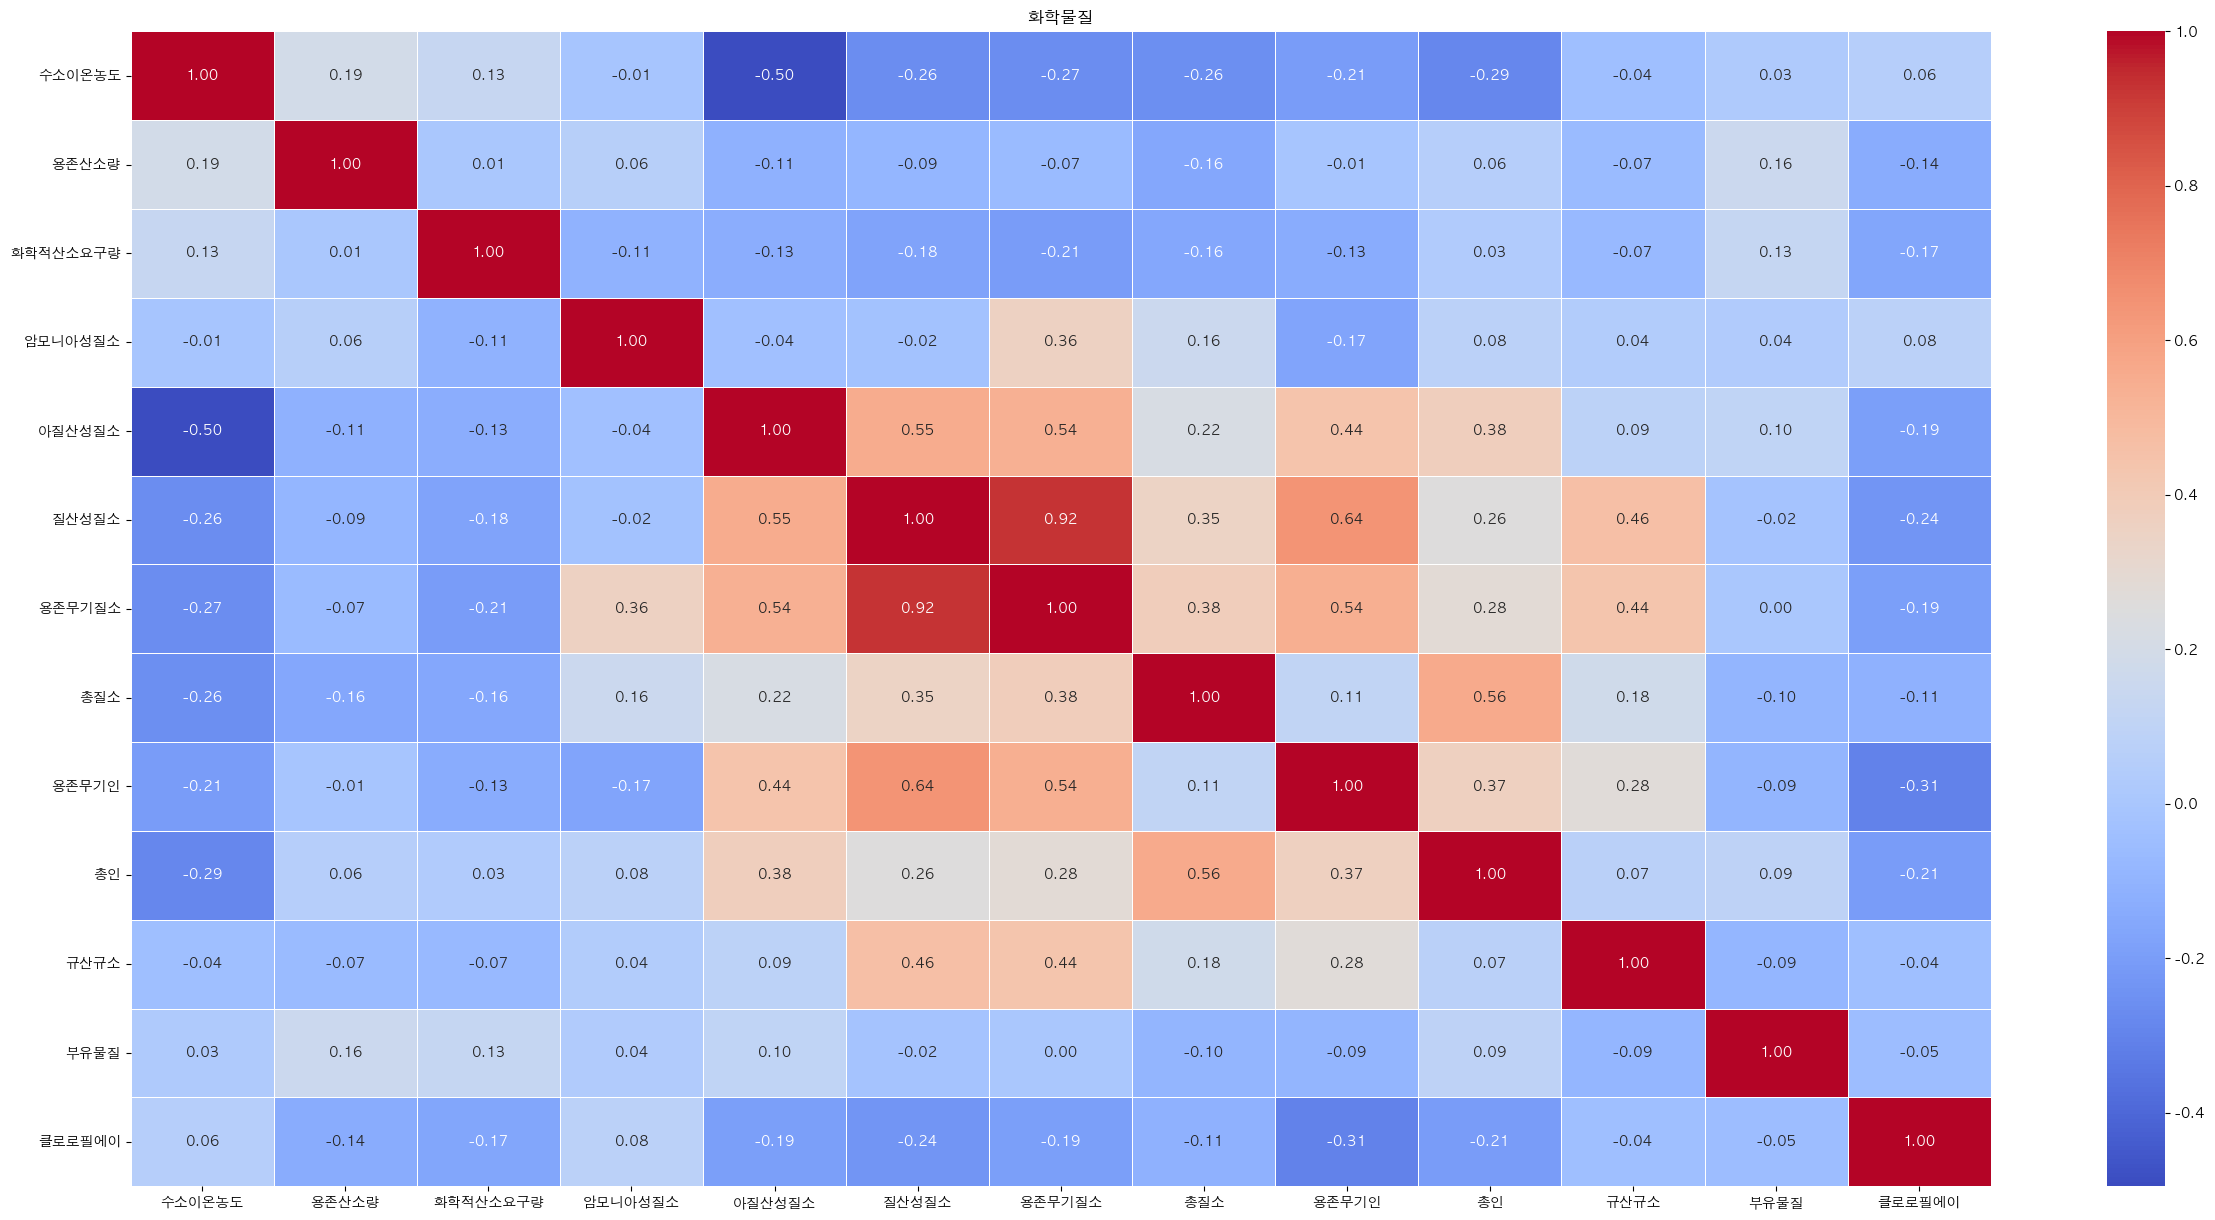

In [151]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

# 수온과 화학적 요소들 사이 상관관계 파악

In [152]:
che2 = seongsan.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [153]:
che2

,수온,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이
18,19.35,8.15,9.25,1.37,11.10,3.91,29.48,44.49,151.62,7.29,17.67,113.96,23.60,1.07
19,20.00,8.15,8.32,1.52,13.76,2.49,12.81,29.06,132.66,3.29,16.46,61.88,23.90,0.96
28,19.34,8.11,7.88,1.00,8.13,5.60,48.33,62.06,219.52,10.23,19.10,175.84,23.35,0.67
29,19.55,8.11,8.21,1.22,9.55,5.35,42.88,57.78,169.09,7.53,20.93,153.13,20.75,0.84
39,23.38,8.26,10.35,2.05,7.20,1.20,14.00,22.40,110.53,1.40,7.78,46.48,28.10,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,15.18,8.38,8.23,0.52,16.70,2.40,26.80,45.90,243.50,7.00,24.70,196.40,2.30,0.00
1614,13.47,8.10,9.07,1.36,9.50,3.00,34.50,47.00,227.50,15.20,25.20,229.70,6.10,0.40
1615,13.73,8.11,9.06,1.49,2.40,4.10,35.60,42.20,256.00,16.30,29.60,183.90,3.20,0.61
1625,13.37,8.10,9.86,1.52,8.90,4.20,51.00,64.10,239.50,11.70,26.80,193.00,7.80,0.64


In [154]:
che2corrs = che2.corr()

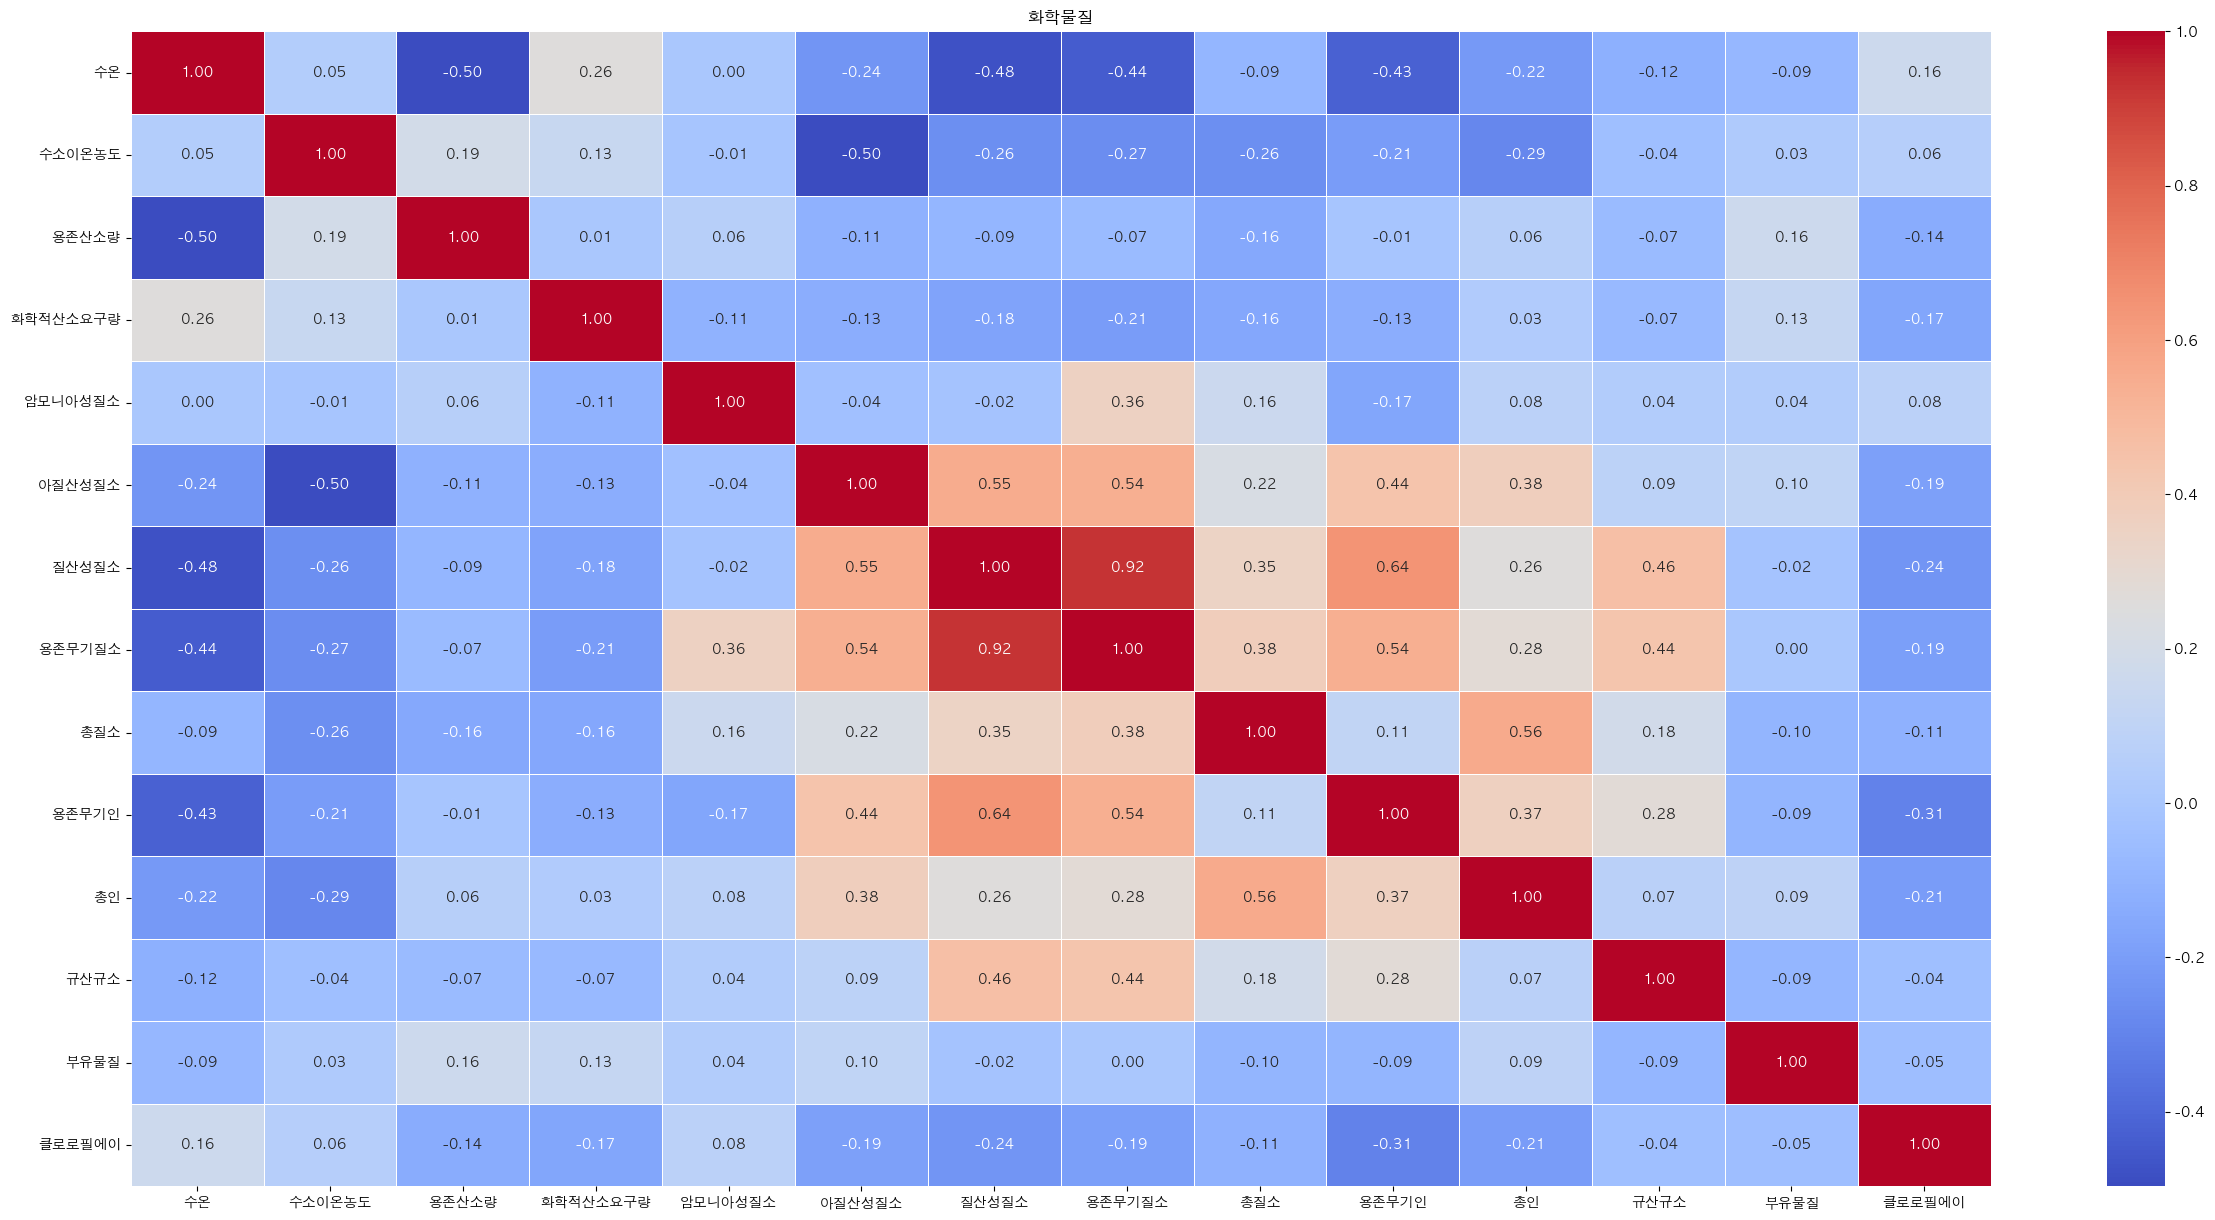

In [155]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

# 이상치 파악

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/367343881.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/36734

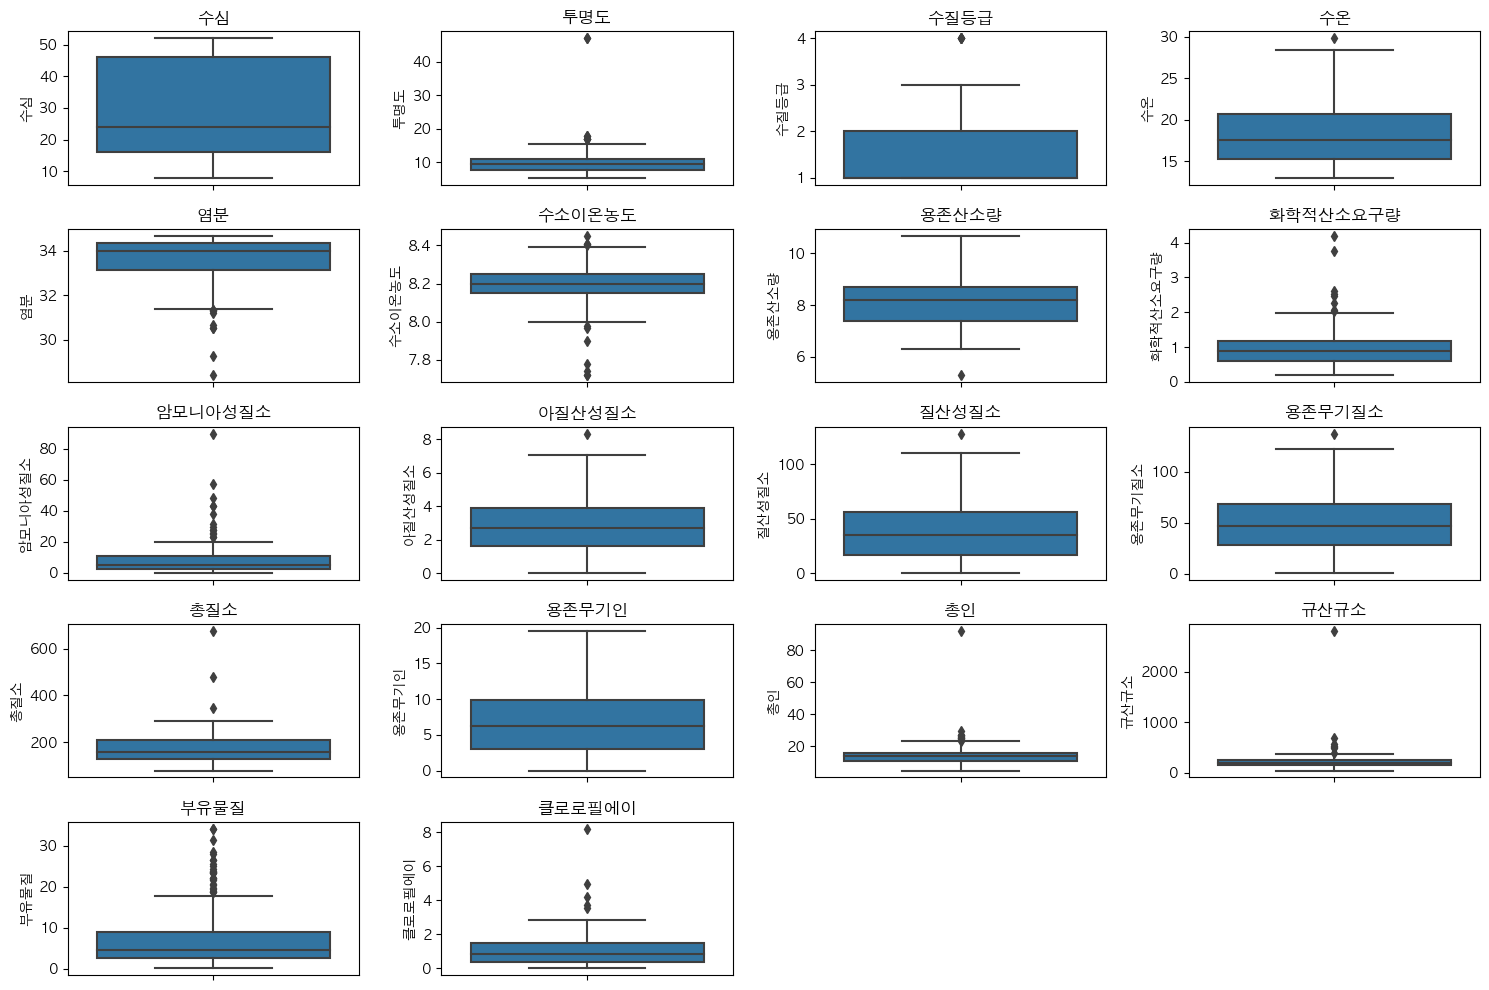

In [127]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/38795

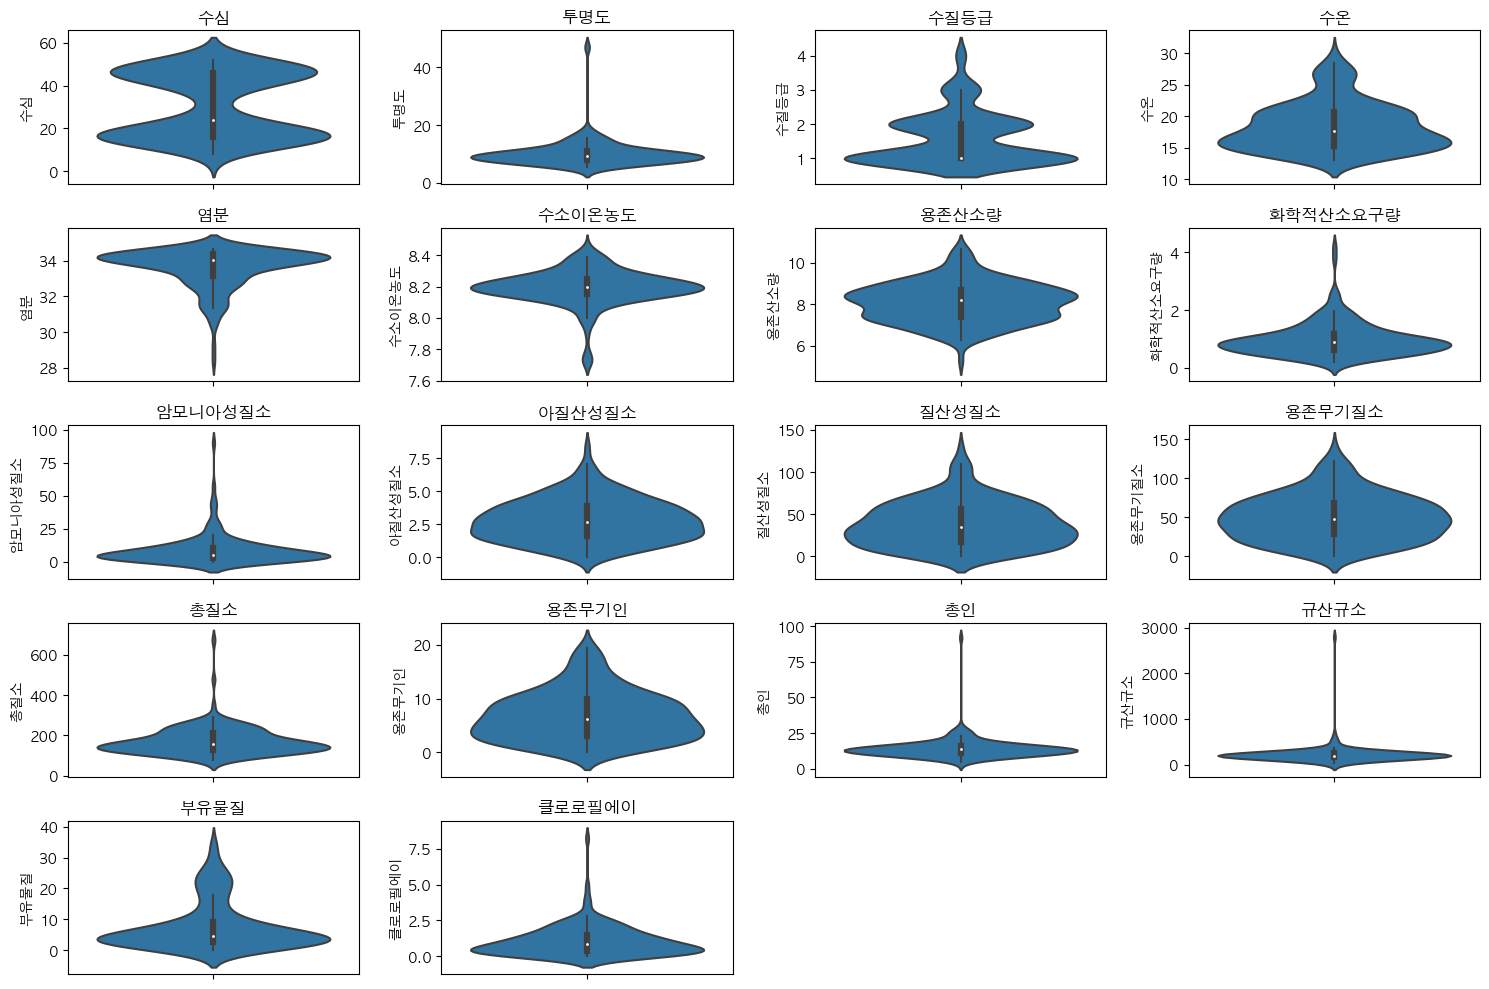

In [128]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

# 산점도 시각화

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_67928/429291424.p

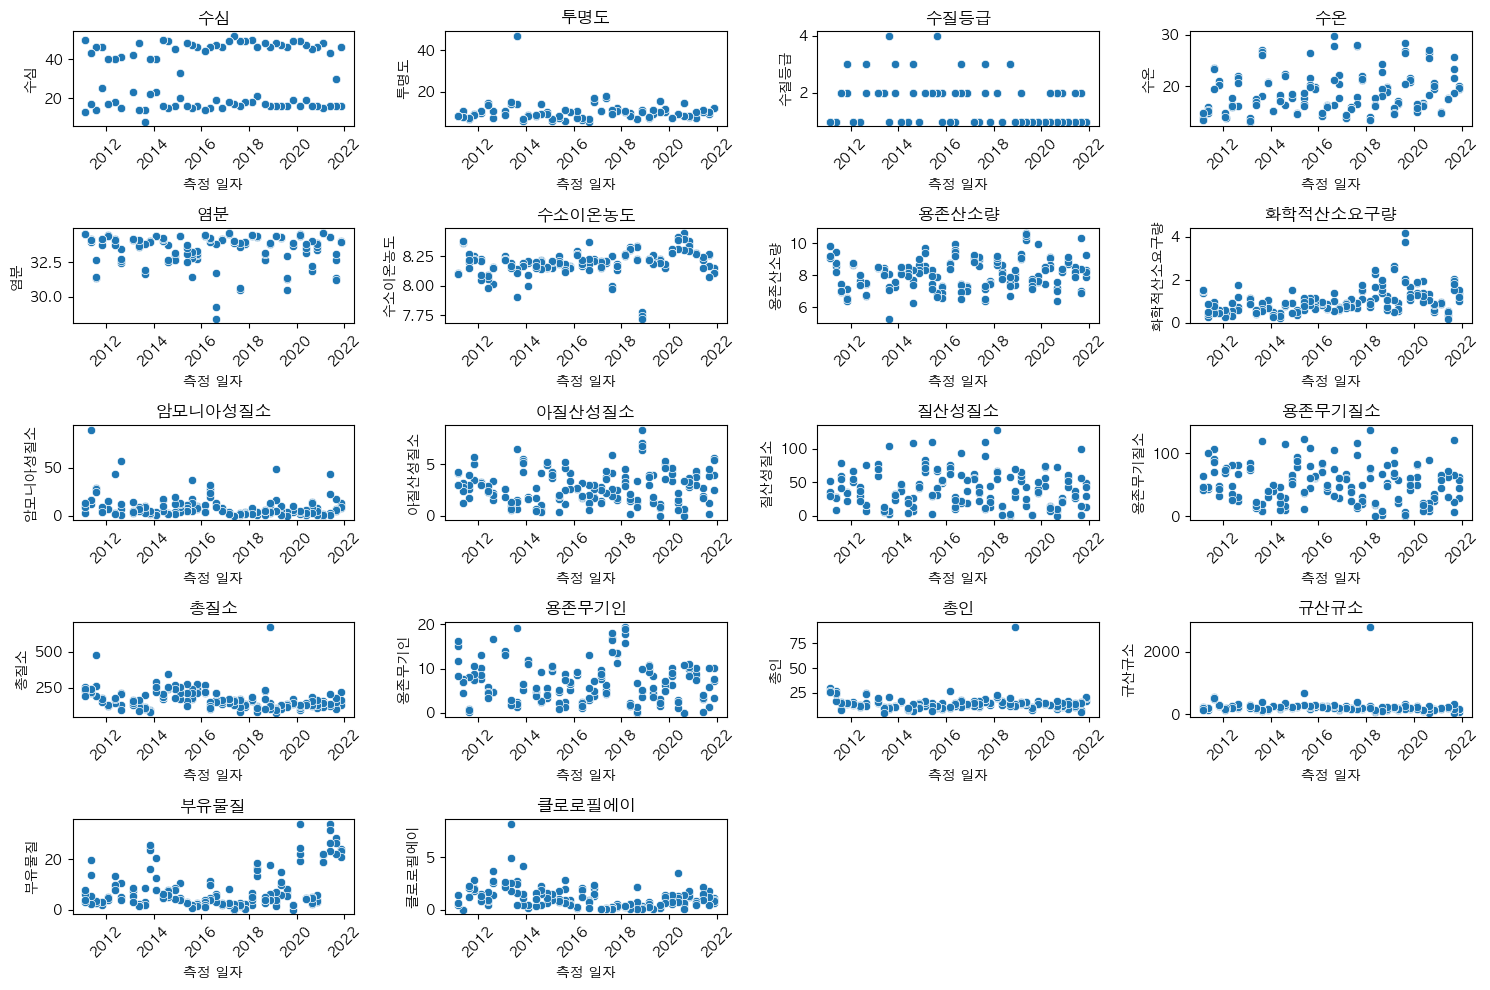

In [129]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=seongsan, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

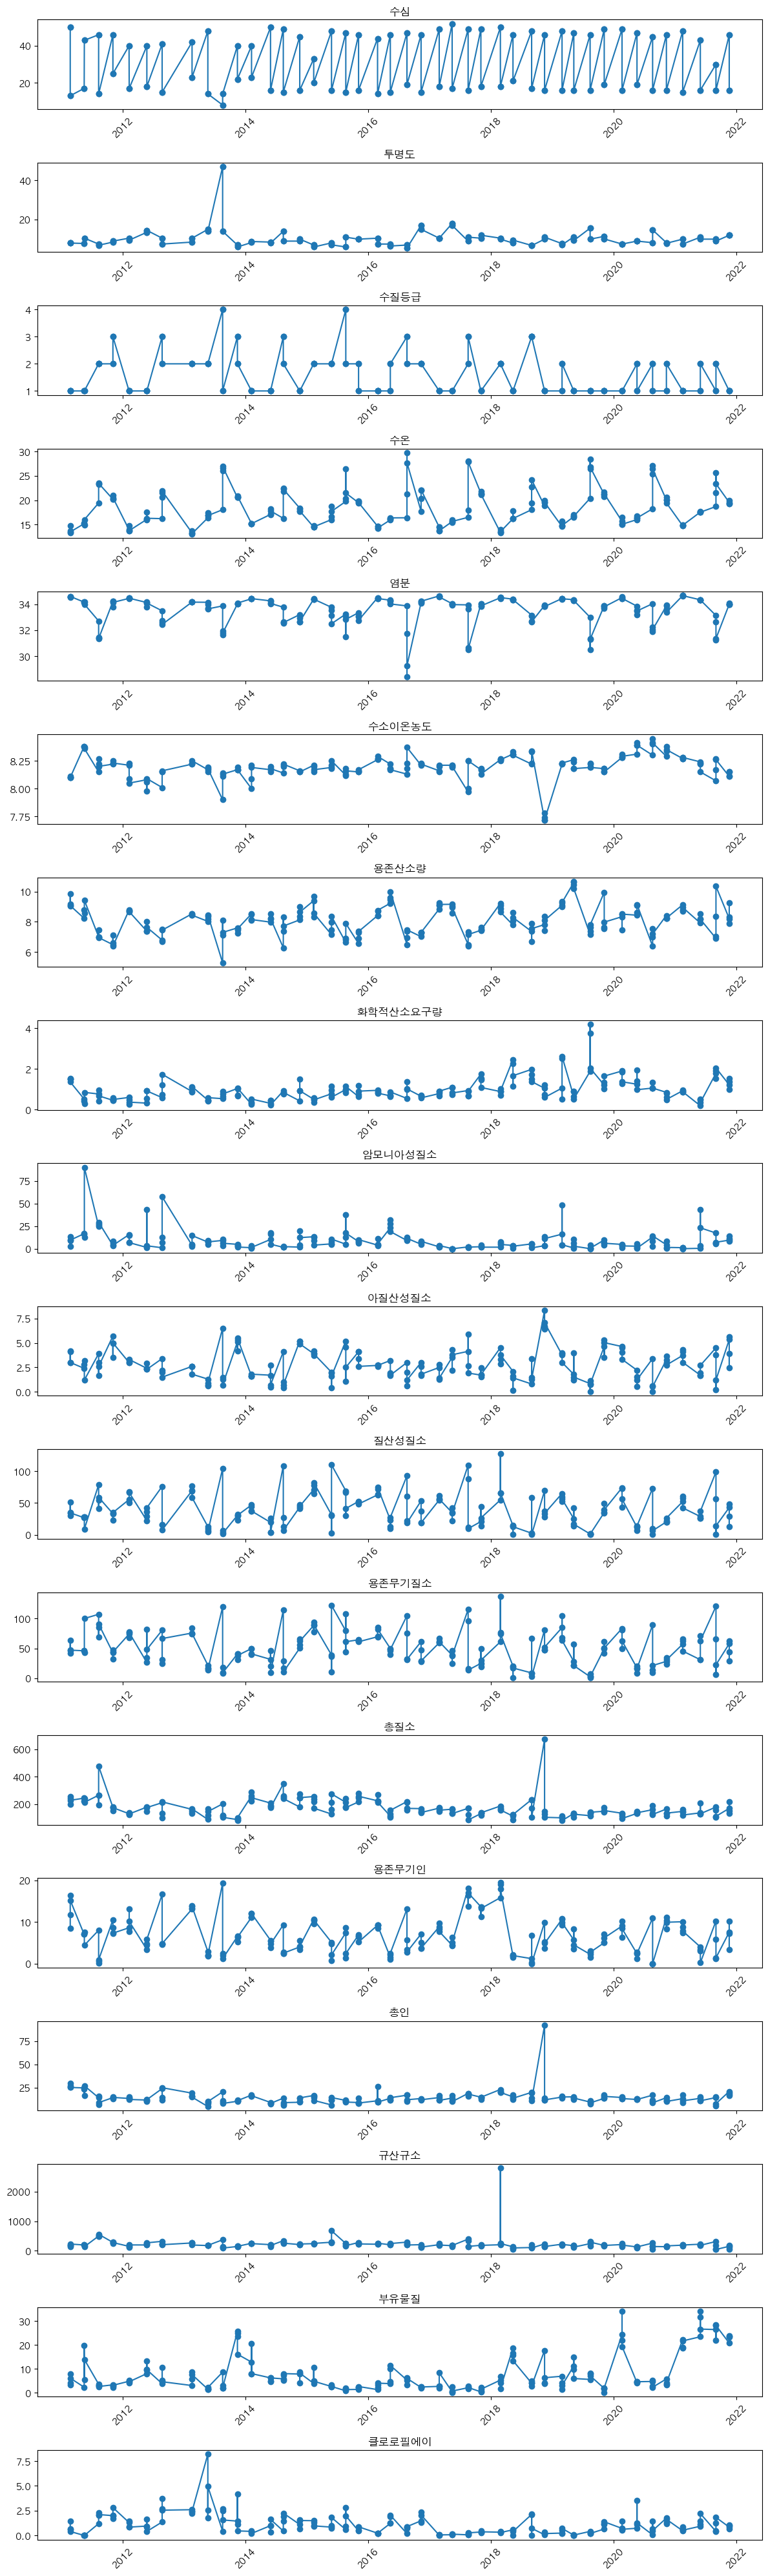

In [130]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 수온과 상관관계가 상대적으로 높은 '수질등급', '화학적산소요구량','클로로필에이'의 움직임 파악

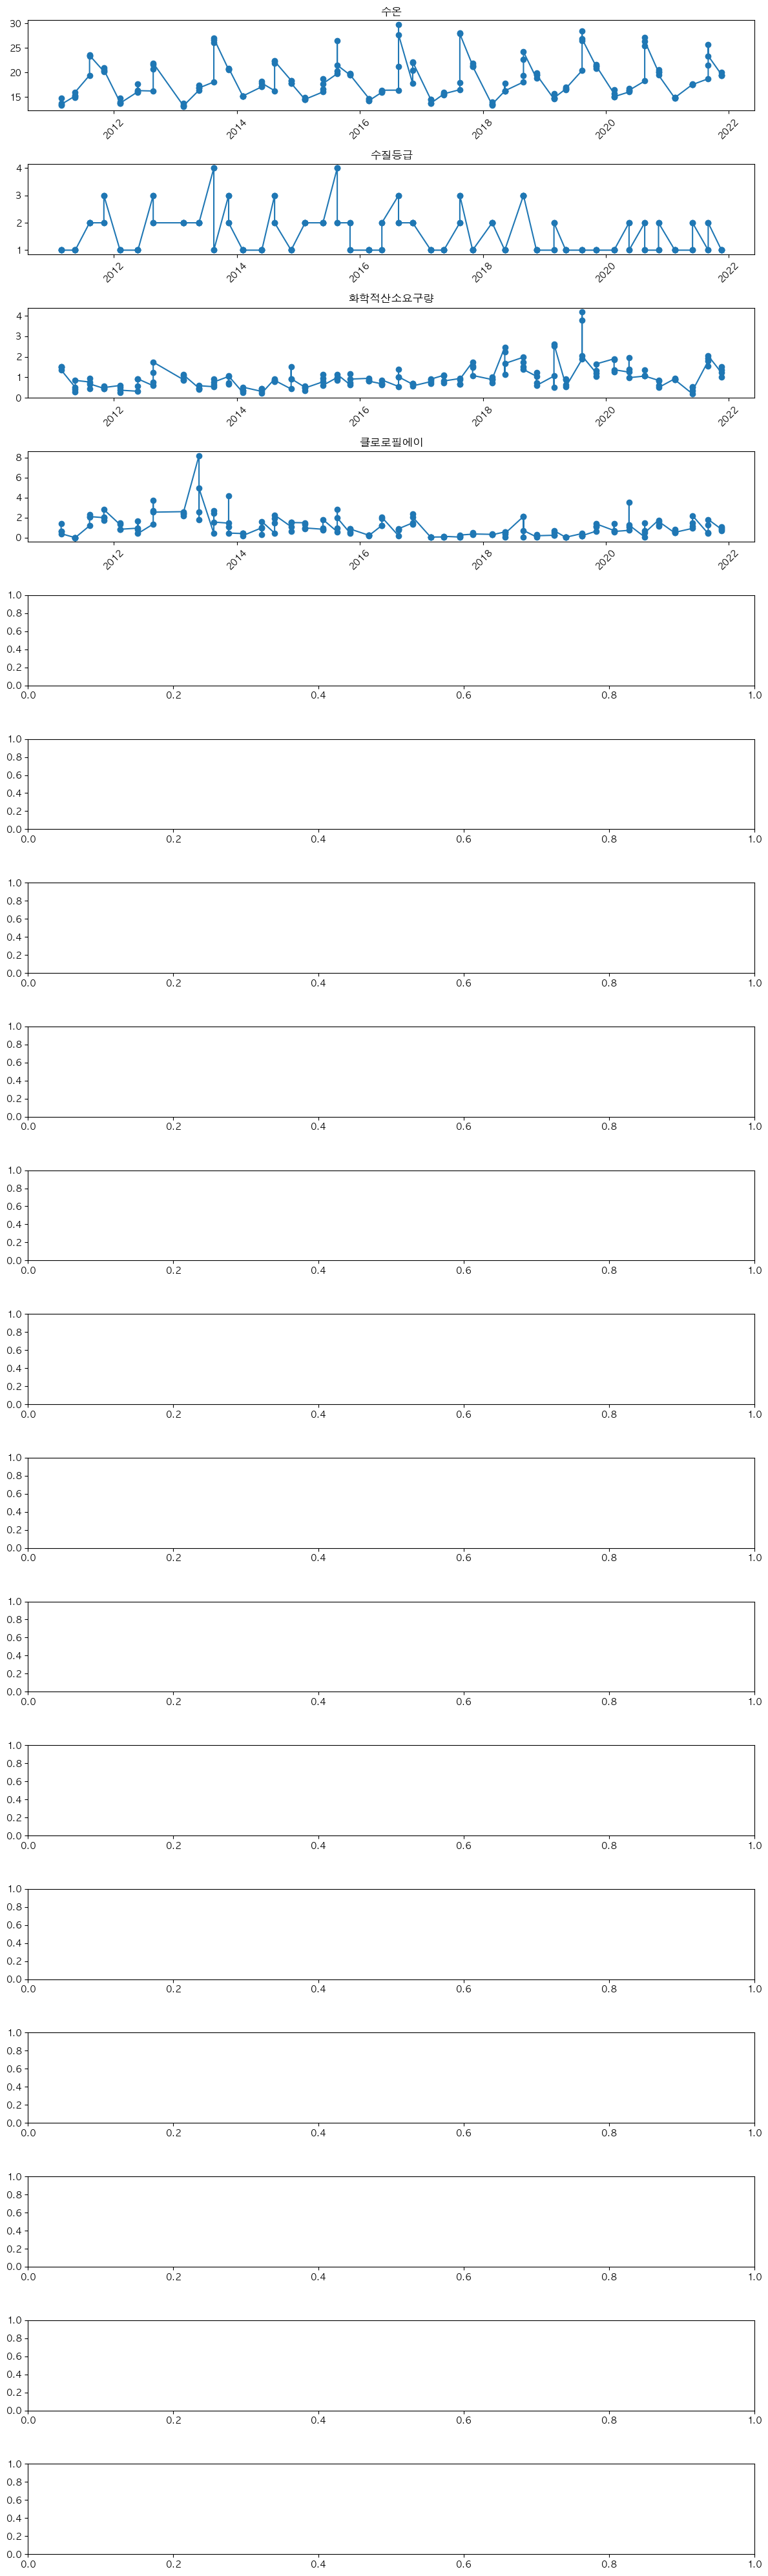

In [131]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(new_col):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
